### 1. The picture of the mean face and top 5 eigenfaces computed by PCA.

In [1]:
#Import train data
import numpy as np
from io import StringIO   # StringIO behaves like a file object
faces_train = np.loadtxt('faces_train.txt')
faces_train.shape

(280, 1024)

In [2]:
#Construct the function which outputs the image
import matplotlib.pyplot as plt
def show_faces(array):
    image = array.reshape(32,32).T
    plt.imshow(image,plt.cm.gray)

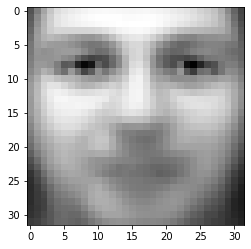

In [3]:
#Calculate the mean for each column in the train data
Mean_matrix = np.mean(faces_train,axis = 0)


#Image the mean face
show_faces(Mean_matrix)

In [4]:
#Subtract the mean form the train matrix
Z_Matrix= faces_train - Mean_matrix
print(Z_Matrix.shape)


#Calculate the covariance matrix
S2_Matrix =np.dot(Z_Matrix.T,Z_Matrix)
print(S2_Matrix.shape)

(280, 1024)
(1024, 1024)


In [5]:
#Calculate the Evigenvalues and Evigenvectors and do some checks
from numpy import linalg as LA
w, v = LA.eig(S2_Matrix.T)
print(w.shape,v.shape)
print(np.inner(v[39],v[99]))
v = v.T
print(np.inner(v[39],v[90]))

#transfer the data type in case of failing explict the image
v = v.astype(np.float64)

(1024,) (1024, 1024)
(0.04601618135088611+3.469446951953614e-18j)
(3.2829641782861074e-16+0j)


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


In [6]:
#sorted the evigenvalue from biggest to smallest
import heapq
max_index = heapq.nlargest(1024, range(len(w)), w.take)

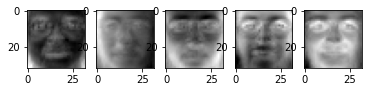

In [7]:
#Output 5 largest evigencalues' faces
for i in range(len(max_index[0:5])):
    plt.subplot(1, 5, i+1)
    image = v[max_index[i]].reshape(32,32).T
    plt.imshow(image,plt.cm.gray)



### 2. Pick a face image in the test set, then project and reconstruct this face using
###     different values of K. Show the results for 4 different K’s and comment on the result.

In [8]:
#Upload Test File
faces_test = np.loadtxt('faces_test.txt')
print(faces_test.shape)

(120, 1024)


In [9]:
# Substract the mean of the train data
Z_Matrix_test= faces_test - Mean_matrix
Z_Matrix_test.shape

(120, 1024)

(8, 1024)
(8,)
(1024,)


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


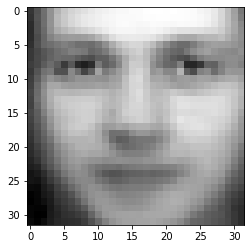

In [10]:
#Pick the different k's and Pick one image from test data
NumberOfTestData = 68
K = [8,40,200,1000]


# (1): Construct the evigenSpace with evigenvectors
# (2): Calculate the weights
# (3): Restore the weights matrix to the 1*1024 and put the image
# (4): Show the image
X_0 = np.vstack((v[k] for k in range(len(max_index)) if k<K[0]))
print(X_0.shape)
Ei_Face_test_0 =np.dot(X_0,Z_Matrix_test[NumberOfTestData].T)
print(Ei_Face_test_0.shape)
Restoration_0 = np.dot(Ei_Face_test_0,X_0)+Mean_matrix
print(Restoration_0.shape)
show_faces(Restoration_0)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


(40, 1024)
(40,)
(1024,)


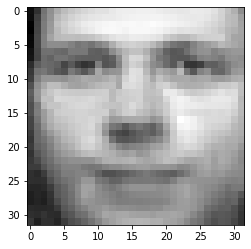

In [11]:
# K = 40
X_1 = np.vstack((v[k] for k in range(len(max_index)) if k<K[1]))
print(X_1.shape)
Ei_Face_test_1 =np.dot(X_1,Z_Matrix_test[NumberOfTestData].T)
print(Ei_Face_test_1.shape)
Restoration_1 = np.dot(Ei_Face_test_1,X_1)+Mean_matrix
print(Restoration_1.shape)
show_faces(Restoration_1)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


(200, 1024)
(200,)
(1024,)


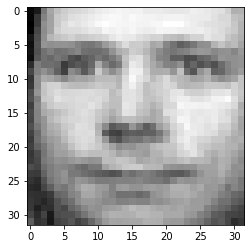

In [12]:
# K = 200
X_2 = np.vstack((v[k] for k in range(len(max_index)) if k<K[2]))
print(X_2.shape)
Ei_Face_test_2 =np.dot(X_2,Z_Matrix_test[NumberOfTestData].T)
print(Ei_Face_test_2.shape)
Restoration_2 = np.dot(Ei_Face_test_2,X_2)+Mean_matrix
print(Restoration_2.shape)
show_faces(Restoration_2)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


(1000, 1024)
(1000,)
(1024,)


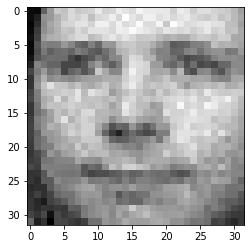

In [13]:
# K = 1000
X_3 = np.vstack((v[k] for k in range(len(max_index)) if k<K[3]))
print(X_3.shape)
Ei_Face_test_3 =np.dot(X_3,Z_Matrix_test[NumberOfTestData].T)
print(Ei_Face_test_3.shape)
Restoration_3 = np.dot(Ei_Face_test_3,X_3)+Mean_matrix
print(Restoration_3.shape)
show_faces(Restoration_3)



### A plot of the nearest-neighbour (1NN) classification rate (on the test data) as a function of K. You can choose any sampling of values K from 1 to 1024, as long as it captures the trend of how classification performance changes as a function of K (i.e., we expect performance to be poor for extremely low K, but then to rise very rapidly and level off at some point).

In [14]:
# Combine all these as a function
import numpy as np
from numpy import linalg as LA
import heapq
import time
def PCA(trainFile,trainFileLabels,testFile,testFileLabels,K):
    start = time.time()
    
    faces_train = np.loadtxt(trainFile)
    faces_train_labels = np.loadtxt(trainFileLabels)
    faces_test = np.loadtxt(testFile)
    faces_test_labels = np.loadtxt(testFileLabels)

    
    Accuracy=[]
    
    #TRAIN
    Mean_matrix = np.mean(faces_train,axis = 0)
    Z_Matrix= faces_train - Mean_matrix
    S2_Matrix =np.dot(Z_Matrix.T,Z_Matrix)
    w, v = LA.eig(S2_Matrix.T)
    v = v.T
    v = np.around(v, decimals=4)
    w = np.around(w, decimals=2)
    #v = v.astype(np.float)
    #w = w.astype(np.float)
    max_index = heapq.nlargest(len(w), range(len(w)), w.take)
    
    #Test
    Z_Matrix_test= faces_test - Mean_matrix
    
    for k in range(1,K+1):
        x = np.vstack((v[l] for l in range(len(max_index)) if l<k))
        Ei_Face =np.dot(x,Z_Matrix.T).T
        #print(Ei_Face.shape)#(1, 280)
        Ei_Face_test =np.dot(x,Z_Matrix_test.T).T
        #print(Ei_Face_test.shape)#(1, 120)
        count = 0
        for j in range(len(faces_test)):
            DistanceList = []
            for i in range(len(faces_train)):
                dist = np.linalg.norm(Ei_Face_test[j] - Ei_Face[i])
                DistanceList.append(dist)
            predict = DistanceList.index(min(DistanceList))
            if faces_train_labels[predict]==faces_test_labels[j]:
                count = count+1
        Accuracy.append(count/len(faces_test))
        '''
        count = 0
        for j in range(len(faces_test)):
            Ei_Face_test =np.dot(x,Z_Matrix_test[j].T)
            k=[]
            for i in range(len(faces_train)):
                dist = np.linalg.norm(Ei_Face_test - Ei_Face.T[i])
                k.append(dist)
            predict = k.index(min(k))
            if faces_train_labels[predict]==faces_test_labels[j]:
                count = count+1
        Accuracy.append(count/len(faces_test))
        '''
        
    end = time.time()
    print('Programm spend time:',end-start,'seconds')
    return Accuracy

In [15]:
trainFile = "faces_train.txt"
trainFileLabels = "faces_train_labels.txt"
testFile = "faces_test.txt"
testFileLabels = "faces_test_labels.txt"
a = PCA(trainFile,trainFileLabels,testFile,testFileLabels,1024)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Programm spend time: 917.4317300319672 seconds


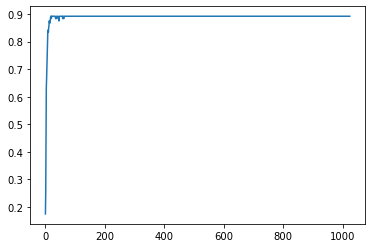

In [16]:
import pylab as pl
 
x = [ix for ix in range(1,1025)]# Make an array of x values
y = [jy for jy in a]
pl.plot(x, y)
pl.show()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Programm spend time: 58.091041564941406 seconds


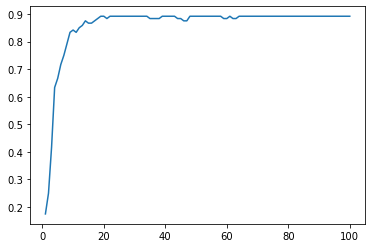

In [18]:
a = PCA(trainFile,trainFileLabels,testFile,testFileLabels,100)
import pylab as pl
 
x = [ix for ix in range(1,101)]# Make an array of x values
y = [jy for jy in a]
pl.plot(x, y)
pl.show()



### Pictures of incorrectly classified faces and their nearest neighbours from the training set for K=100. 

In [25]:
# Combine all these as a function
import numpy as np
from numpy import linalg as LA
import heapq
import time
def PCA_4(trainFile,trainFileLabels,testFile,testFileLabels,K):
    start = time.time()
    
    faces_train = np.loadtxt(trainFile)
    faces_train_labels = np.loadtxt(trainFileLabels)
    faces_test = np.loadtxt(testFile)
    faces_test_labels = np.loadtxt(testFileLabels)

    
    Accuracy=[]
    
    #TRAIN
    Mean_matrix = np.mean(faces_train,axis = 0)
    Z_Matrix= faces_train - Mean_matrix
    S2_Matrix =np.dot(Z_Matrix.T,Z_Matrix)
    w, v = LA.eig(S2_Matrix.T)
    v = v.T
    v = np.around(v, decimals=4)
    w = np.around(w, decimals=2)
    #v = v.astype(np.float)
    #w = w.astype(np.float)
    max_index = heapq.nlargest(len(w), range(len(w)), w.take)
    
    #Test
    Z_Matrix_test= faces_test - Mean_matrix
    
    for k in range(K,K+1):
        x = np.vstack((v[l] for l in range(len(max_index)) if l<k))
        Ei_Face =np.dot(x,Z_Matrix.T).T
        #print(Ei_Face.shape)#(1, 280)
        Ei_Face_test =np.dot(x,Z_Matrix_test.T).T
        #print(Ei_Face_test.shape)#(1, 120)
        count = 0
        print(len(faces_test))
        for j in range(len(faces_test)):
            DistanceList = []
            for i in range(len(faces_train)):
                dist = np.linalg.norm(Ei_Face_test[j] - Ei_Face[i])
                DistanceList.append(dist)
            predict = DistanceList.index(min(DistanceList))
            if faces_train_labels[predict]!=faces_test_labels[j]:
                Accuracy.append([predict,j])
        '''
        count = 0
        for j in range(len(faces_test)):
            Ei_Face_test =np.dot(x,Z_Matrix_test[j].T)
            k=[]
            for i in range(len(faces_train)):
                dist = np.linalg.norm(Ei_Face_test - Ei_Face.T[i])
                k.append(dist)
            predict = k.index(min(k))
            if faces_train_labels[predict]==faces_test_labels[j]:
                count = count+1
        Accuracy.append(count/len(faces_test))
        '''
        
    end = time.time()
    print('Programm spend time:',end-start,'seconds')
    return Accuracy

In [27]:
trainFile = "faces_train.txt"
trainFileLabels = "faces_train_labels.txt"
testFile = "faces_test.txt"
testFileLabels = "faces_test_labels.txt"
b = PCA_4(trainFile,trainFileLabels,testFile,testFileLabels,100)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


120
Programm spend time: 2.683483362197876 seconds


In [28]:
b

[[82, 0],
 [88, 7],
 [155, 8],
 [89, 11],
 [277, 14],
 [5, 22],
 [273, 26],
 [242, 28],
 [54, 29],
 [146, 36],
 [6, 46],
 [173, 77],
 [99, 106]]

In [30]:
faces_train = np.loadtxt(trainFile)
faces_test = np.loadtxt(testFile)

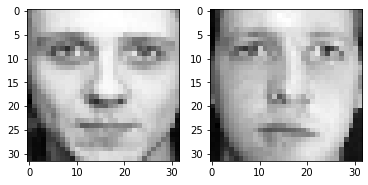

In [31]:
plt.subplot(1, 2, 1)
image = faces_train[b[0][0]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)
plt.subplot(1, 2, 2)
image = faces_test[b[0][1]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)

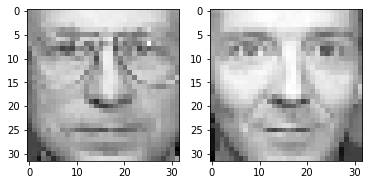

In [32]:
plt.subplot(1, 2, 1)
image = faces_train[b[1][0]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)
plt.subplot(1, 2, 2)
image = faces_test[b[1][1]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)

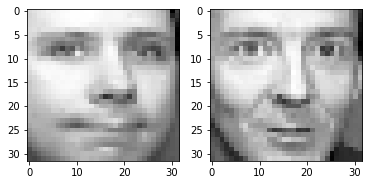

In [33]:
plt.subplot(1, 2, 1)
image = faces_train[b[2][0]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)
plt.subplot(1, 2, 2)
image = faces_test[b[2][1]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)

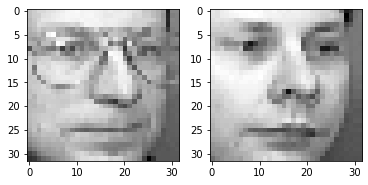

In [34]:
plt.subplot(1, 2, 1)
image = faces_train[b[3][0]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)
plt.subplot(1, 2, 2)
image = faces_test[b[3][1]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)

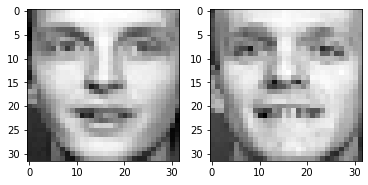

In [35]:
plt.subplot(1, 2, 1)
image = faces_train[b[4][0]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)
plt.subplot(1, 2, 2)
image = faces_test[b[4][1]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)

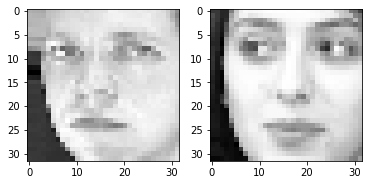

In [36]:
plt.subplot(1, 2, 1)
image = faces_train[b[5][0]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)
plt.subplot(1, 2, 2)
image = faces_test[b[5][1]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)

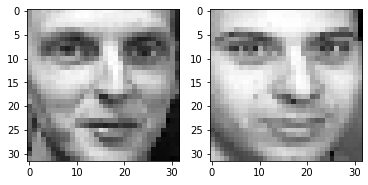

In [37]:
plt.subplot(1, 2, 1)
image = faces_train[b[6][0]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)
plt.subplot(1, 2, 2)
image = faces_test[b[6][1]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)

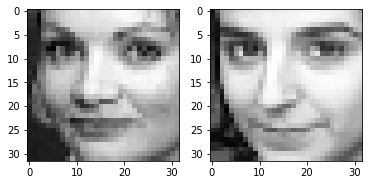

In [38]:
plt.subplot(1, 2, 1)
image = faces_train[b[7][0]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)
plt.subplot(1, 2, 2)
image = faces_test[b[7][1]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)

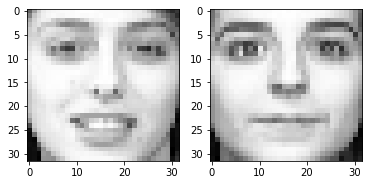

In [39]:
plt.subplot(1, 2, 1)
image = faces_train[b[8][0]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)
plt.subplot(1, 2, 2)
image = faces_test[b[8][1]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)

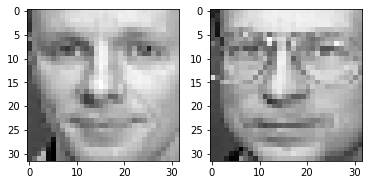

In [40]:
plt.subplot(1, 2, 1)
image = faces_train[b[9][0]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)
plt.subplot(1, 2, 2)
image = faces_test[b[9][1]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)

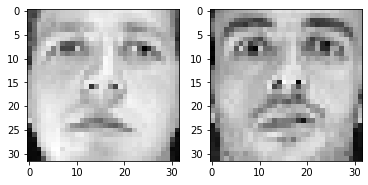

In [41]:
plt.subplot(1, 2, 1)
image = faces_train[b[10][0]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)
plt.subplot(1, 2, 2)
image = faces_test[b[10][1]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)

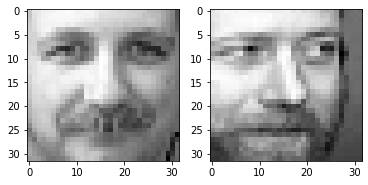

In [42]:
plt.subplot(1, 2, 1)
image = faces_train[b[11][0]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)
plt.subplot(1, 2, 2)
image = faces_test[b[11][1]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)

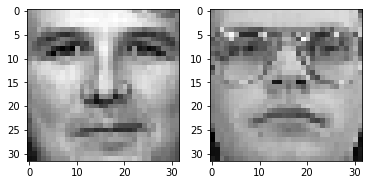

In [43]:
plt.subplot(1, 2, 1)
image = faces_train[b[12][0]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)
plt.subplot(1, 2, 2)
image = faces_test[b[12][1]].reshape(32,32).T
plt.imshow(image,plt.cm.gray)



### Extract a few 32x32 patches from non-face images and investigate their behavior when they are projected onto the “face space”. Project these patches onto the face space for different values of K, and display the reconstructed versions of these patches, along with the reconstruction errors. Compare the reconstruction errors to those for face images from the database. You can also try it with 32x32 face patches not from the database. Try to decide what threshold on the reconstruction error can distinguish between face and non-face images.

In [84]:
faces_train = np.loadtxt('faces_train.txt')
Mean_matrix = np.mean(faces_train,axis = 0)
Z_Matrix= faces_train - Mean_matrix
S2_Matrix =np.dot(Z_Matrix.T,Z_Matrix)
w, v = LA.eig(S2_Matrix.T)
v = v.T
v = v.astype(np.float64)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


In [85]:
x = np.vstack((v[k] for k in range(len(max_index)) if k<5))

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [86]:
#Construct the random picture
Random_Picture=np.random.random((2,1024))
Z_Matrix_RP= Random_Picture - Mean_matrix
Random_Picture

array([[0.53819696, 0.99772103, 0.98993289, ..., 0.89607303, 0.36434979,
        0.07353709],
       [0.61266711, 0.92289112, 0.86264469, ..., 0.8443163 , 0.9925252 ,
        0.90728311]])

In [87]:
Ei_Face_RP =np.dot(x,Z_Matrix_RP.T)

(2, 1024)


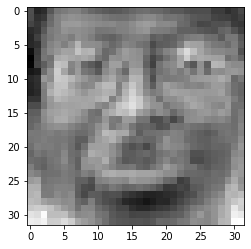

In [88]:
Restoration_RP = np.dot(Ei_Face_RP.T,x)+Mean_matrix
print(Restoration_RP.shape)
show_faces(Restoration_RP[0])

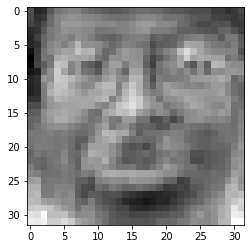

In [89]:
show_faces(Restoration_RP[1])

In [90]:
error1 = np.linalg.norm(Random_Picture-Restoration_RP)
error1

1296.627448449008

In [91]:
faces_test = np.loadtxt('faces_test.txt')
faces_test44 = faces_test[44:46]
Z_Matrix_test44= faces_test44 - Mean_matrix
Ei_Face_test44 =np.dot(x,Z_Matrix_test44.T)
Restoration44= np.dot(Ei_Face_test44.T,x)+Mean_matrix
error2 = np.linalg.norm(faces_test44-Restoration44)
error2

837.9377992168284